<a href="https://colab.research.google.com/github/Jack1Hayes/passenger_predictor/blob/main/tensorflow_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")

#df = df[df.booking_origin != 'Australia']
#df = df[df.sales_channel != 'Mobile']
#df = df[df.flight_hour < 15]
#df = df[df.length_of_stay < 25]
#df.drop(labels='route', axis = 1)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

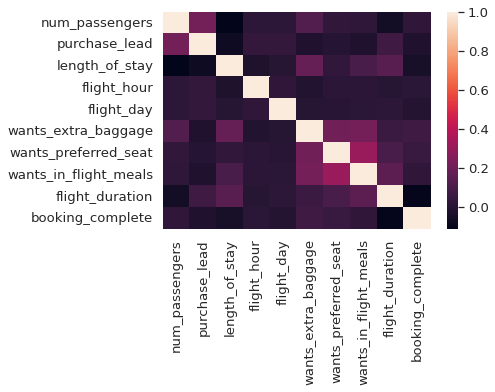

In [ ]:
#plt.bar(df['flight_day'].value_counts(),df['booking_complete'])
import seaborn as sns; sns.set(font_scale=1.2)

sns.heatmap(df.corr())

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Split training and test data

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
y_train = train.pop('booking_complete')
y_test = test.pop('booking_complete')


In [ ]:
y_train.head()

3145     0
32430    1
14701    0
38520    0
34422    0
Name: booking_complete, dtype: int64

In [ ]:
y_test.head()

47826    1
13746    0
10935    0
34628    0
23638    0
Name: booking_complete, dtype: int64

In [ ]:
train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
3145,1,Internet,RoundTrip,47,20,13,5,CANMEL,Australia,1,1,1,8.83
32430,1,Internet,RoundTrip,155,4,13,7,HNDSIN,Malaysia,1,1,1,7.57
14701,1,Internet,RoundTrip,242,23,11,1,ICNSYD,Australia,1,0,0,8.58
38520,1,Mobile,RoundTrip,39,5,13,1,HKTPVG,China,0,0,0,5.33
34422,4,Internet,RoundTrip,22,4,9,2,PENTPE,Malaysia,1,1,1,4.67


In [ ]:
test.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
47826,2,Mobile,RoundTrip,106,6,14,2,JHBTPE,Malaysia,1,1,1,4.67
13746,2,Internet,OneWay,3,17,12,5,ICNMEL,South Korea,0,1,1,8.83
10935,1,Internet,RoundTrip,60,20,14,7,DPSPUS,South Korea,0,0,0,6.33
34628,1,Mobile,RoundTrip,3,4,2,6,PERTPE,Australia,0,0,0,5.62
23638,1,Internet,RoundTrip,105,26,20,6,PERSGN,Australia,1,0,0,5.62


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
CATEGORICAL_COLUMNS = ['sales_channel', 'trip_type', 'route', 'booking_origin']
NUMERIC_COLUMNS = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = train[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sales_channel', vocabulary_list=('Internet', 'Mobile'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='trip_type', vocabulary_list=('RoundTrip', 'OneWay', 'CircleTrip'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='route', vocabulary_list=('CANMEL', 'HNDSIN', 'ICNSYD', 'HKTPVG', 'PENTPE', 'CTUDPS', 'HKTPEK', 'PERPNH', 'KTMMFM', 'MELSGN', 'HKTPER', 'BKIOOL', 'DMKPER', 'AKLKUL', 'HDYPEK', 'KCHSYD', 'SGNSYD', 'DMKMEL', 'DPSSYD', 'DMKKIX', 'DELDPS', 'HNDIKA', 'DMKICN', 'CGKHND', 'HGHPEN', 'COKMEL', 'COKOOL', 'DPSPVG', 'MNLPER', 'HANSYD', 'KCHOOL', 'JHBXIY', 'BDOHGH', 'HKTSYD', 'HKGPER', 'DPSICN', 'HNDPEN', 'BTUCKG', 'CGKKIX', 'CGKHGH', 'KLOMEL', 'CMBMEL', 'DMKSYD', 'DMKPUS', 'ICNMEL', 'OOLTPE', 'CNXKIX', 'ICNPER', 'DELPER', 'OOLSZX', 'CGKPUS', 'MELPEN', 'KIXSIN', 'DMKOOL', 'CNXICN', 'BKIKIX', 'HNDKNO', 'CGKMEL', 'ICNJHB', 'HKGMEL', 'CMBSYD', 'PEKPEN', 'PENPER', 

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(test, y_test, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=2)
# We create a linear estimtor by passing the feature columns we created earlier

In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model



0.8483


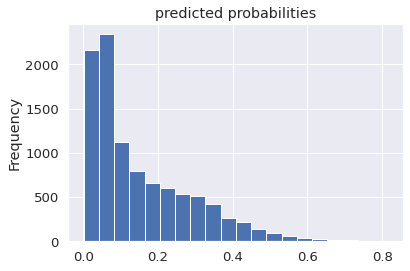

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [ ]:
from numpy.lib.function_base import append
x = []
y = []
tot = []

for i in probs:
  if i >= 0.5:
    x.append(i)
    tot.append(1)
  else:
    y.append(i)
    tot.append(0)
    

print(len(x), len(y))
y_test.value_counts()

209 9791


0    8470
1    1530
Name: booking_complete, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tot))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8470
           1       0.53      0.07      0.13      1530

    accuracy                           0.85     10000
   macro avg       0.69      0.53      0.52     10000
weighted avg       0.81      0.85      0.80     10000



In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,tot))

MAE 0.1517


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,tot))

MSE 0.1517
